In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def lane_correction(speed_results, threshold = 0.1):
  # [vehicle_id, vehicle_type, speed_bg, speed_gr, avg_speed, acceleration]
  # only include entries with speed > threshold (moving vehicles)
  #filtered = [entry for entry in speed_results
              #if float(entry[2]) > threshold and float(entry[3]) > threshold and float(entry[4]) > threshold]

  filtered = [entry for entry in speed_results if float(entry[4]) > threshold]

  return filtered


def report_results(results_arr):
  ## total vehicles
  print("Total vehicles identified:", len(results_arr))
  print()

  ## vehicle type counts
  vehicle_types = [v[1] for v in results_arr]
  type_counts = Counter(vehicle_types)
  print("Count of vehicle IDs for each type:")
  for type_name, count in type_counts.items():
      print(f"Type {type_name}: {count} vehicle(s)")
  print()

  ## speeding
  speed_limit = 25

  speed_results_array = np.array(results_arr)
  avg_speeds = speed_results_array[:, 4].astype(float)

  # Count the number of cars exceeding the speed limit
  overspeed_count = np.sum(avg_speeds > speed_limit)
  reckless_driving_count = np.sum(avg_speeds > (speed_limit+30))

  # Total number of cars identified (assumed to be the length of the speed_results array)
  total_cars = len(speed_results_array)

  # Calculate the percentage of cars that are overspeeding
  overspeed_percentage = (overspeed_count / total_cars) * 100

  print("NYC speed limit: 25 mph (40.2 km/h)")
  print(f"Total vehicles identified with speed: {total_cars}")
  print(f"Total vehicles overspeeding: {overspeed_count}")
  print(f"Percentage of vehicles overspeeding: {overspeed_percentage:.2f}%")
  print(f"Percentage of vehicles reckless_driving: {overspeed_percentage:.2f}%")


### Load Data

In [29]:
all_detected = pd.read_csv('all_detected_vehicles.csv')

In [30]:
all_detected.columns

Index(['VehicleID', 'Type', 'SpeedBG', 'SpeedGR', 'AvgSpeed', 'Acceleration'], dtype='object')

In [ ]:
reckless = all_detected[
    (all_detected['SpeedBG'] > 25) |
    (all_detected['SpeedGR'] > 25) |
    (all_detected['AvgSpeed'] > 25) |
    (all_detected['Acceleration'] < -10)
]
len(reckless)

8

In [ ]:
reckless

,VehicleID,Type,SpeedBG,SpeedGR,AvgSpeed,Acceleration
32,207,Motorcycle,30.30,30.86,30.58,0.58
199,1468,Bicycle,29.25,25.35,27.30,-4.80
217,1593,Motorcycle,37.98,36.05,37.02,-2.75
279,1990,Car,35.36,32.93,34.14,-3.53
319,2507,Motorcycle,27.92,25.36,26.64,-2.40
325,2541,Motorcycle,25.01,28.69,26.85,2.84
377,2876,Car,25.94,29.19,27.56,2.63
384,2964,Car,26.41,27.15,26.78,0.69


In [36]:
detected = all_detected[
    (all_detected['SpeedBG'] > 0.35) |
    (all_detected['SpeedGR'] > 0.35) |
    (all_detected['AvgSpeed'] > 0.35)
]
len(detected)

72

In [43]:
detected = detected[detected['VehicleID'] != 2]
detected = detected[detected['VehicleID'] != 1100]
len(detected)

70

In [ ]:
filtered = all_detected[all_detected['AvgSpeed'] > 0.02]

In [ ]:
filtered.tail(52)

,VehicleID,Type,SpeedBG,SpeedGR,AvgSpeed,Acceleration
175,1272,Car,0.00,0.12,0.06,0.30
176,1275,Car,0.00,0.07,0.03,0.07
179,1299,Car,0.00,0.22,0.11,0.45
181,1235,Motorcycle,0.34,0.40,0.37,0.00
184,1341,Bus,3.59,4.96,4.28,0.25
186,1359,Motorcycle,10.04,12.81,11.42,0.99
189,1388,Truck,10.67,14.08,12.37,1.28
191,1414,Car,13.98,17.06,15.52,1.46
194,1434,Motorcycle,11.09,16.91,14.00,2.46
199,1468,Bicycle,29.25,25.35,27.30,-4.80


In [ ]:
# load detected vehicle_speeds
detected = pd.read_csv('vehicle_speeds.csv')
detected

,VehicleID,Type,SpeedBG,SpeedGR,AvgSpeed,Acceleration
0,34,Motorcycle,6.28,9.18,7.73,0.68
1,68,Car,8.43,10.87,9.65,0.73
2,125,Motorcycle,12.20,10.31,11.26,-0.65
3,207,Motorcycle,30.30,30.86,30.58,0.58
4,220,Motorcycle,11.68,17.27,14.47,2.43
...,...,...,...,...,...,...
57,2795,Motorcycle,10.54,13.82,12.18,1.20
58,2835,Car,16.56,16.74,16.65,0.09
59,2876,Car,25.94,29.19,27.56,2.63
60,2964,Car,26.41,27.15,26.78,0.69


In [ ]:
detected.head(35)

,VehicleID,Type,SpeedBG,SpeedGR,AvgSpeed,Acceleration
0,34,Motorcycle,6.28,9.18,7.73,0.68
1,68,Car,8.43,10.87,9.65,0.73
2,125,Motorcycle,12.20,10.31,11.26,-0.65
3,207,Motorcycle,30.30,30.86,30.58,0.58
4,220,Motorcycle,11.68,17.27,14.47,2.43
5,432,Truck,8.03,12.82,10.42,1.44
6,481,Motorcycle,10.86,13.91,12.38,1.15
7,507,Car,12.40,11.15,11.77,-0.45
8,558,Car,16.07,18.72,17.40,1.44
9,610,Car,17.17,19.70,18.44,1.45


In [ ]:
detected.tail(30)

,VehicleID,Type,SpeedBG,SpeedGR,AvgSpeed,Acceleration
32,1414,Car,13.98,17.06,15.52,1.46
33,1434,Motorcycle,11.09,16.91,14.00,2.46
34,1468,Bicycle,29.25,25.35,27.30,-4.80
35,1478,Car,19.97,17.48,18.73,-1.46
36,1512,Motorcycle,18.03,21.91,19.97,2.39
37,1593,Motorcycle,37.98,36.05,37.02,-2.75
38,1624,Motorcycle,12.37,13.33,12.85,0.38
39,1690,Car,0.24,8.05,4.14,0.12
40,1811,Car,6.70,11.46,9.08,1.24
41,1851,Car,10.29,13.67,11.98,1.27


In [ ]:
np.unique(detected['Type'])

array(['Bicycle', 'Bus', 'Car', 'Motorcycle', 'Truck'], dtype=object)

In [ ]:
v_types_dict = {
    'Car': [56, 26, 25, 0, 2, 0, 3],
    'Motorcycle': [4, 1, 3, 0, 0, 0, 0],
    'Bus': [4, 2, 0, 1, 0, 0, 1],
    'Truck': [4, 1, 0, 0, 2, 0, 1],
    'Bicycle': [9, 4, 2, 0, 0, 1, 2]
}

typesdf = pd.DataFrame.from_dict(v_types_dict, orient = 'index', columns = ['Actual', 'Classified as Car', 'Classified as Motorcycle', 'Classified as Bus', 'Classified as Truck', 'Classified as Bicycle', 'Missed'])

In [ ]:
typesdf

,Actual,Classified as Car,Classified as Motorcycle,Classified as Bus,Classified as Truck,Classified as Bike,Missed
Car,56,26,25,0,2,0,3
Motorcycle,4,1,3,0,0,0,0
Bus,4,2,0,1,0,0,1
Truck,4,1,0,0,2,0,1
Bike,9,4,2,0,0,1,2


### assign specific colors to each type

In [ ]:
assigned_colors = {
    'Car': 'tab:blue',        # Blue for Cars
    'Motorcycle': 'tab:orange',  # Orange for Motorcycles
    'Truck': 'tab:green',     # Green for Trucks
    'Bus': 'tab:red',         # Red for Buses
    'Bicycle': 'tab:purple',   # Purple for Bicycles
    'Missed': 'gray'
}

###visualize types

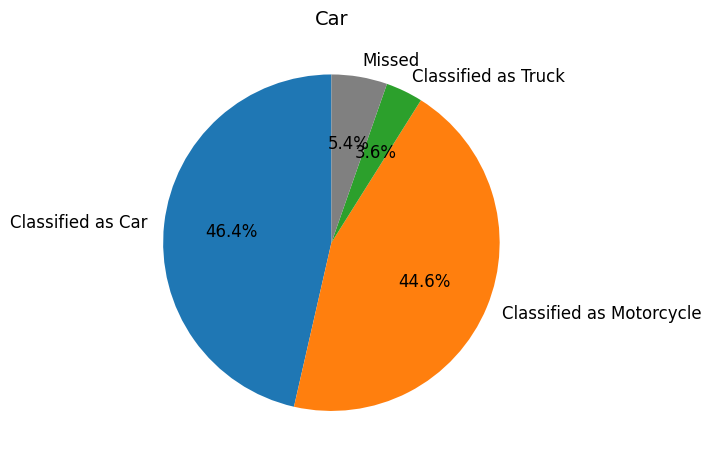

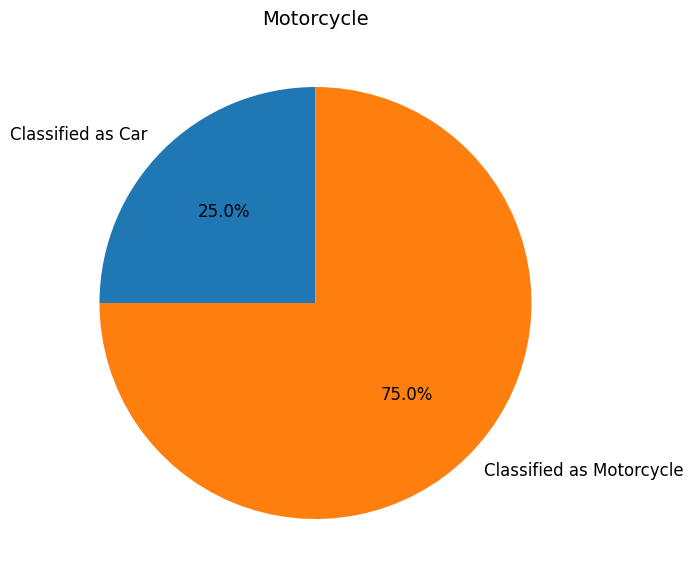

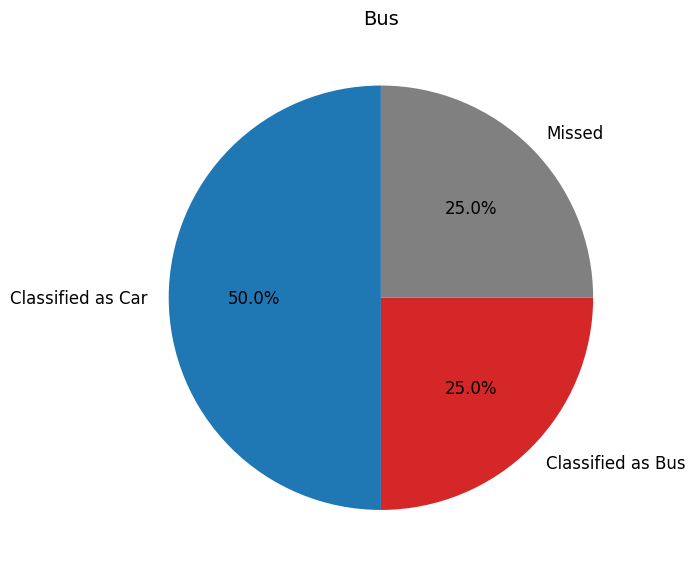

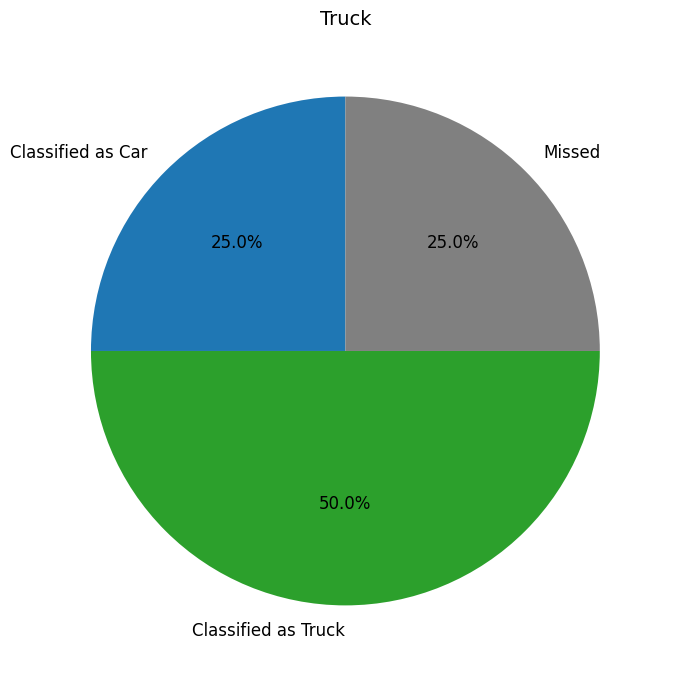

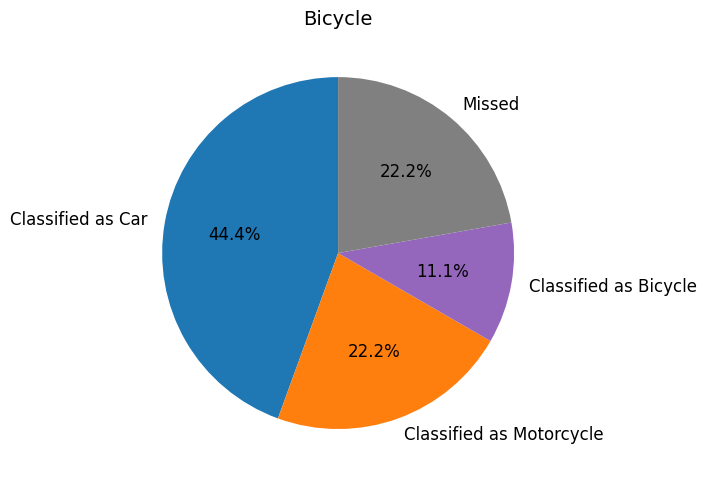

In [ ]:
def create_vehicle_classification_pie_no_zeros_bottom_title(vehicle_type, data_row, color_mapping):
    def autopct_ignore_zeros(pct):
        return f'{pct:.1f}%' if pct > 0 else ''

    classification_data = data_row[1:]
    classification_labels = classification_data.index.tolist()
    classification_colors = [color_mapping.get(label.split()[-1], 'gray') for label in classification_labels]

    filtered_data = [(label, value) for label, value in zip(classification_labels, classification_data) if value > 0]
    if not filtered_data:
        return

    filtered_labels, filtered_values = zip(*filtered_data)
    filtered_colors = [color_mapping.get(label.split()[-1], 'gray') for label in filtered_labels]

    fig, ax = plt.subplots(figsize=(7, 7))
    ax.pie(filtered_values, labels=filtered_labels, autopct=autopct_ignore_zeros, colors=filtered_colors, textprops={'fontsize': 12}, startangle=90)

    ax.set_title(vehicle_type, fontsize=14)
    plt.tight_layout()
    plt.show()


for vehicle_type, row in typesdf.iterrows():
    create_vehicle_classification_pie_no_zeros_bottom_title(vehicle_type, row, assigned_colors)


### visualize detected speed

In [44]:
def plot_avg_speed_distribution(data, color_dict):
    plt.figure(figsize=(8, 6))
    palette = {type_: color_dict.get(type_, 'tab:gray') for type_ in data['Type'].unique()}
    sns.scatterplot(data=data, x='Type', y='AvgSpeed', hue='Type', palette=palette, style='Type', s=130)
    plt.title('Speed Distribution by Vehicle Type')
    plt.xlabel('Vehicle Type')
    plt.ylabel('Average Speed (mph)')
    plt.grid(True)
    plt.legend(title='Type')
    plt.show()

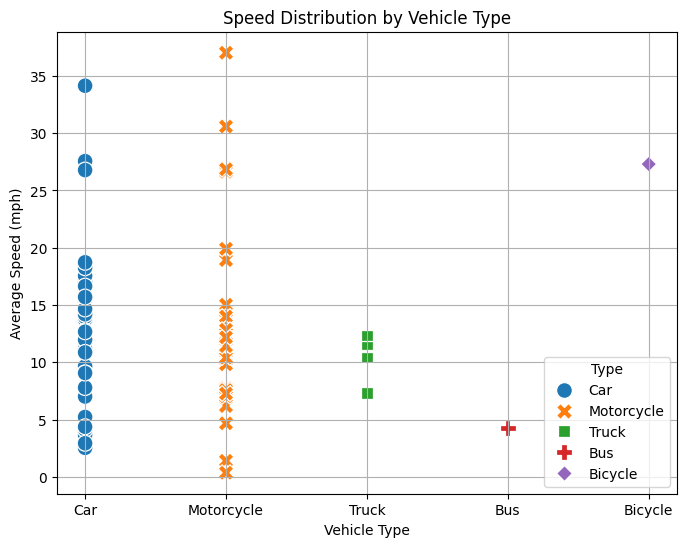

In [45]:
plot_avg_speed_distribution(detected, assigned_colors)

### Reckless Driving Percentage

In [ ]:
# Create a filter for the conditions
condition = (detected['AvgSpeed'] > 25) | (detected['Acceleration'] < -10)

# Filter the DataFrame based on the condition
filtered_df = detected[condition]

# Calculate the percentage of each vehicle type meeting the condition
total_counts = detected['Type'].value_counts()
condition_counts = filtered_df['Type'].value_counts()
percentages = (condition_counts / total_counts * 100).fillna(0)  # Fill NaN with 0 if any type has no entries


<ipython-input-52-1457a698922c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentages.index, y=percentages.values, palette=colors)


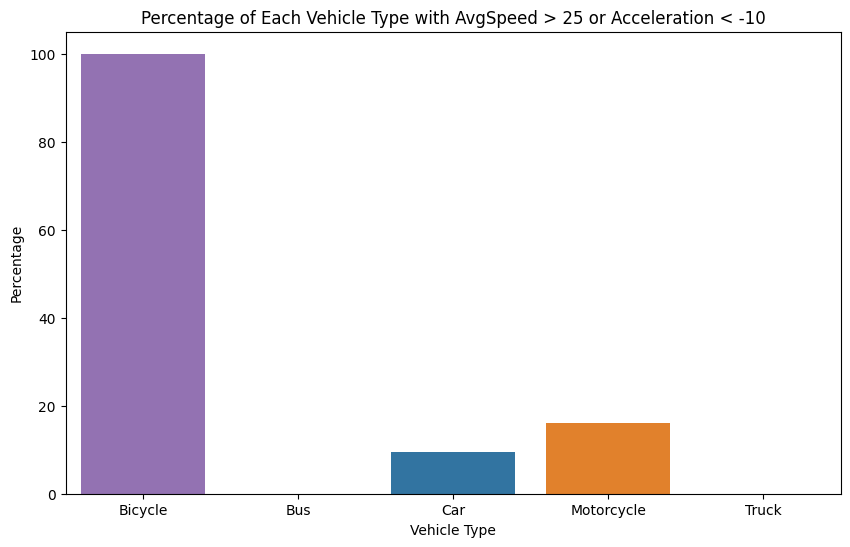

In [ ]:

colors = [assigned_colors.get(x, 'tab:gray') for x in percentages.index]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=percentages.index, y=percentages.values, palette=colors)
plt.title('Percentage of Each Vehicle Type with AvgSpeed > 25 or Acceleration < -10')
plt.ylabel('Percentage')
plt.xlabel('Vehicle Type')
plt.show()
